In [1]:
import matplotlib.pyplot as plt
from my_nn import my_MPL, flower_dataset
import numpy as np
import sklearn



In [9]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    x = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(x.T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

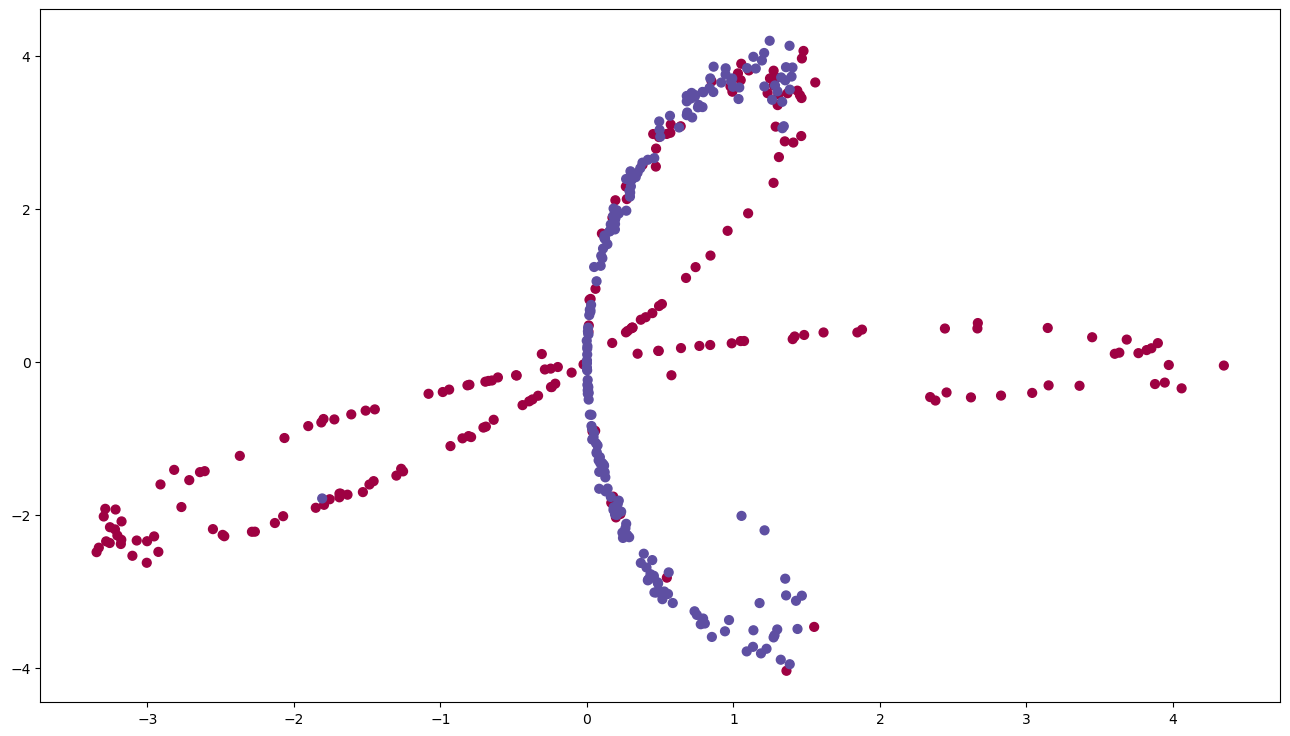

In [3]:
dataset = flower_dataset(num_petals=5)

# plot dataset
dataset.plot_flower()


X = dataset.points
Y = dataset.labels


In [4]:
model = my_MPL(num_inputs=X.shape[0], hidden_layers=[3], num_outputs=Y.shape[0], activations=['tanh'])

model.get_parameters()

the weight matrix W1 is :
 [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]]
the bias b1 is :
 [[0.]
 [0.]
 [0.]] 
the weight matrix W2 is :
 [[-0.06755814 -0.51194391 -0.03577739]]
the bias b2 is :
 [[0.]] 


[{'W1': array([[ 1.78862847,  0.43650985],
         [ 0.09649747, -1.8634927 ],
         [-0.2773882 , -0.35475898]]),
  'W2': array([[-0.06755814, -0.51194391, -0.03577739]])},
 {'b1': array([[0.],
         [0.],
         [0.]]),
  'b2': array([[0.]])}]

In [5]:

model.train(X, Y, num_iter=10000, learning_rate=1.2)

model.accuracy(X, Y)

Cost function : 0.7039842393389761 at iter 0
Cost function : 0.33363077548196374 at iter 1000
Cost function : 0.33056478193785693 at iter 2000
Cost function : 0.3304735216365682 at iter 3000
Cost function : 0.32979185811601924 at iter 4000
Cost function : 0.32929440152305633 at iter 5000
Cost function : 0.32888379850227395 at iter 6000
Cost function : 0.3285210374433945 at iter 7000
Cost function : 0.32818631510982144 at iter 8000
Cost function : 0.3278705062021785 at iter 9000
Training complete!
Accuracy on this set is: 0.855


In [6]:
predictions = model.predict(X)


In [7]:
predictions.shape

(1, 400)

In [8]:
model.get_parameters()

the weight matrix W1 is :
 [[10.97936206  0.73195341]
 [ 1.99559125 -2.56128946]
 [-2.56494863 -1.2146135 ]]
the bias b1 is :
 [[1.45692438]
 [2.88839632]
 [1.6533442 ]] 
the weight matrix W2 is :
 [[ 3.79413766 -8.31676531  9.3758352 ]]
the bias b2 is :
 [[-2.21197262]] 


[{'W1': array([[10.97936206,  0.73195341],
         [ 1.99559125, -2.56128946],
         [-2.56494863, -1.2146135 ]]),
  'W2': array([[ 3.79413766, -8.31676531,  9.3758352 ]])},
 {'b1': array([[1.45692438],
         [2.88839632],
         [1.6533442 ]]),
  'b2': array([[-2.21197262]])}]

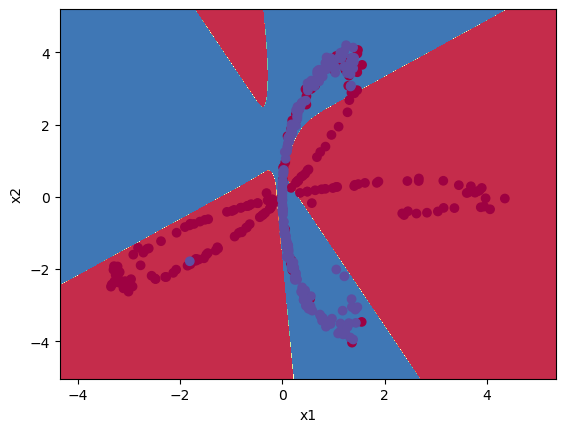

In [9]:
plot_decision_boundary(model, X, Y)

## Example 2

In [10]:

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

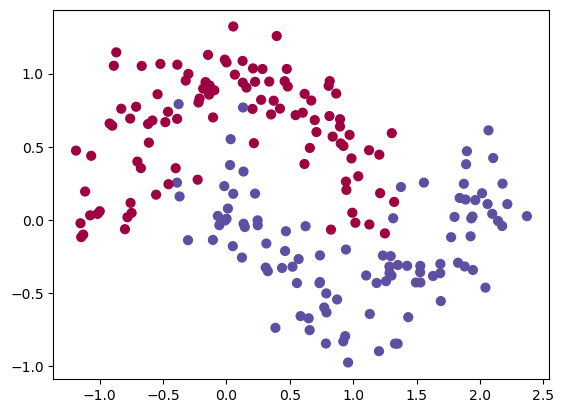

In [11]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"


X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

In [12]:
n_x = X.shape[0]
n_y = Y.shape[0]
hidden = [3]
model = my_MPL(num_inputs = n_x, hidden_layers = hidden, num_outputs = n_y,activations = ['tanh'])

In [13]:

model.train(X, Y, num_iter=10000, learning_rate=0.5)

model.accuracy(X, Y)

Cost function : 0.8457553438334893 at iter 0
Cost function : 0.10209091124744601 at iter 1000
Cost function : 0.0886173750677314 at iter 2000
Cost function : 0.08597397806120444 at iter 3000
Cost function : 0.08460980740414085 at iter 4000
Cost function : 0.08369821838674603 at iter 5000
Cost function : 0.08301215682026303 at iter 6000
Cost function : 0.0824611711449153 at iter 7000
Cost function : 0.08200092665545444 at iter 8000
Cost function : 0.0816063161845413 at iter 9000
Training complete!
Accuracy on this set is: 0.975


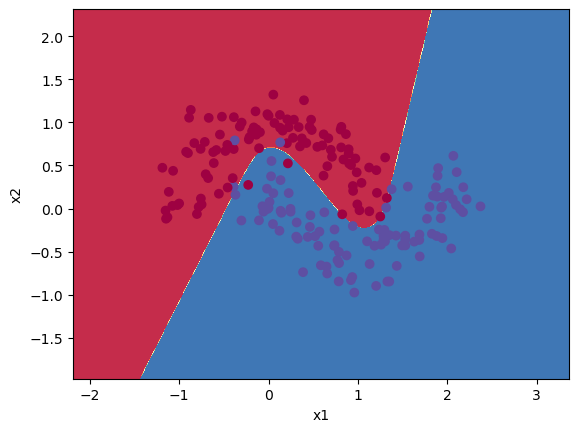

In [14]:
plot_decision_boundary(model, X, Y)

Try different units in the hiiden layer

Cost function : 1.1184645506617577 at iter 0
Cost function : 0.06592852317257489 at iter 1000
Cost function : 0.038036836154123385 at iter 2000
Cost function : 0.017609198374911025 at iter 3000
Cost function : 0.011193083666850925 at iter 4000
Cost function : 0.005305317612962503 at iter 5000
Cost function : 0.002238920070582974 at iter 6000
Cost function : 0.0013696055982829558 at iter 7000
Cost function : 0.000978704899477278 at iter 8000
Cost function : 0.0007506290386936778 at iter 9000
Training complete!
for [12, 15] units in hidden layer the accuracy is: 
Accuracy on this set is: 1.0
Cost function : 1.1572243117812622 at iter 0
Cost function : 0.05422309961892611 at iter 1000
Cost function : 0.023093773822944308 at iter 2000
Cost function : 0.013572545392519756 at iter 3000
Cost function : 0.010810107449305844 at iter 4000
Cost function : 0.009393753888380192 at iter 5000
Cost function : 0.008442649683307874 at iter 6000
Cost function : 0.007712737312383344 at iter 7000
Cost func

/Users/juliana/Library/CloudStorage/GoogleDrive-juliosoriomorales@gmail.com/My Drive/JuliCompu/MachineLearning/DeepLearning/My_NNs/my_nn.py:404: RuntimeWarning: divide by zero encountered in log
  cost = -(np.dot(Y, np.log(output).T) + np.dot(1 - Y, np.log(1 - output).T)) / m
/Users/juliana/Library/CloudStorage/GoogleDrive-juliosoriomorales@gmail.com/My Drive/JuliCompu/MachineLearning/DeepLearning/My_NNs/my_nn.py:253: RuntimeWarning: invalid value encountered in divide
  dAL_plus1 =  -(np.divide(Y, A_L_plus1) - np.divide(1 - Y, 1 - A_L_plus1))


Training complete!
for [20, 20] units in hidden layer the accuracy is: 
Accuracy on this set is: 0.5
Cost function : 0.5686842180401175 at iter 0
Cost function : 0.06690993419314145 at iter 1000
Cost function : 0.043704625327399056 at iter 2000
Cost function : 0.020496405122253522 at iter 3000
Cost function : 0.009368143287491007 at iter 4000
Cost function : 0.0039001415504740077 at iter 5000
Cost function : 0.0022885433112876633 at iter 6000
Cost function : 0.0015467825951957326 at iter 7000
Cost function : 0.001143563899400133 at iter 8000
Cost function : 0.0008972949092100044 at iter 9000
Training complete!
for [15, 20] units in hidden layer the accuracy is: 
Accuracy on this set is: 1.0


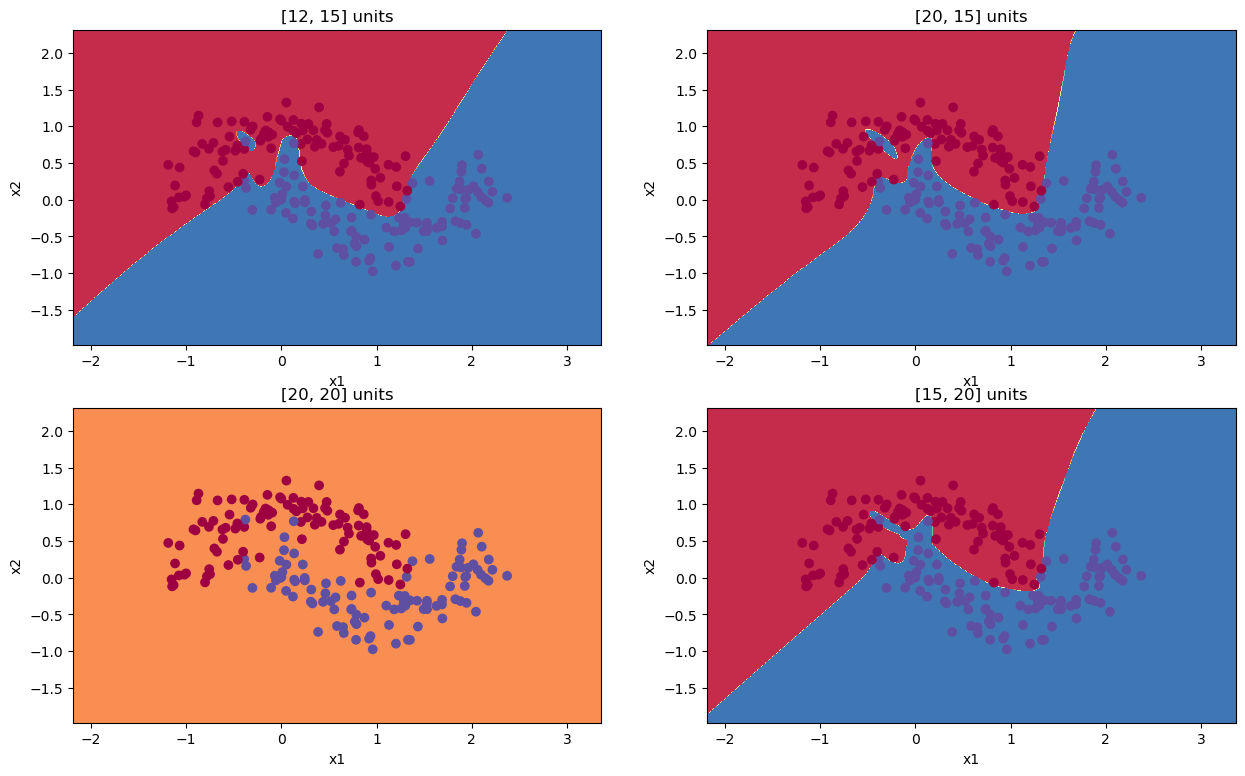

In [15]:
#Hidden = [[10, 7, 5], [5, 6, 7], [8, 10, 12], [15, 10]]
Hidden = [[12, 15], [20, 15], [20, 20], [15, 20]]

plt.figure(figsize=(15,9))


for i, hidden in enumerate(Hidden):
    model = my_MPL(num_inputs = n_x, hidden_layers = hidden, num_outputs = n_y,activations = ['tanh'])
    model.train(X, Y, num_iter=10000, learning_rate=1.2)
    print("for {} units in hidden layer the accuracy is: ".format(hidden[:]))
    model.accuracy(X, Y)
    print("=======================")
    plt.subplot(2,2, i+1)
    plot_decision_boundary(model, X, Y)
    plt.title("{} units".format(hidden[:]))
    

trying different learning rates:

Cost function : 0.7314495083771146 at iter 0
Cost function : 0.23152617648890952 at iter 1000
Cost function : 0.13870785849611025 at iter 2000
Cost function : 0.10159675671545967 at iter 3000
Cost function : 0.09263182217631638 at iter 4000
Cost function : 0.08916312225922994 at iter 5000
Cost function : 0.08724875146123995 at iter 6000
Cost function : 0.08597123898075772 at iter 7000
Cost function : 0.08502301477507239 at iter 8000
Cost function : 0.08426950105390837 at iter 9000
Training complete!
for learning rate 0.2 the accuracy is: 
Accuracy on this set is: 0.965
Cost function : 0.7314495083771146 at iter 0
Cost function : 0.17919221187976142 at iter 1000
Cost function : 0.10211739385605015 at iter 2000
Cost function : 0.09068875433013332 at iter 3000
Cost function : 0.08729405818992655 at iter 4000
Cost function : 0.08549904368703323 at iter 5000
Cost function : 0.08429845410186967 at iter 6000
Cost function : 0.08338837706008062 at iter 7000
Cost function : 0.08264011863021686 

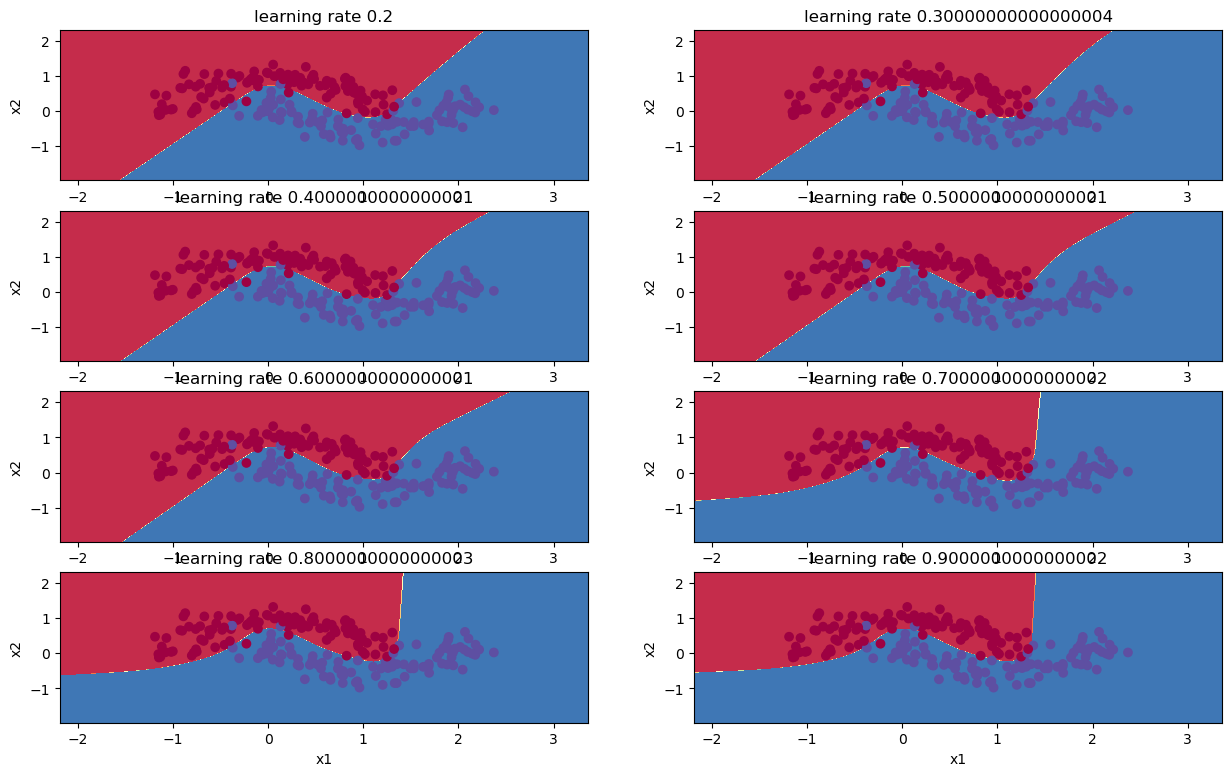

In [16]:
rates = np.arange(0.2,1 , 0.1)
plt.figure(figsize=(15,9))

for i, rate in enumerate(rates):
    model = my_MPL(num_inputs = n_x, hidden_layers = [4], num_outputs = n_y,activations = ['tanh'])
    model.train(X, Y, num_iter=10000, learning_rate=rate)
    print("for learning rate {} the accuracy is: ".format(rate))
    model.accuracy(X, Y)
    print("=======================")
    plt.subplot(4,2, i+1)
    plot_decision_boundary(model, X, Y)
    plt.title("learning rate {}".format(rate))
    

## Example 3:

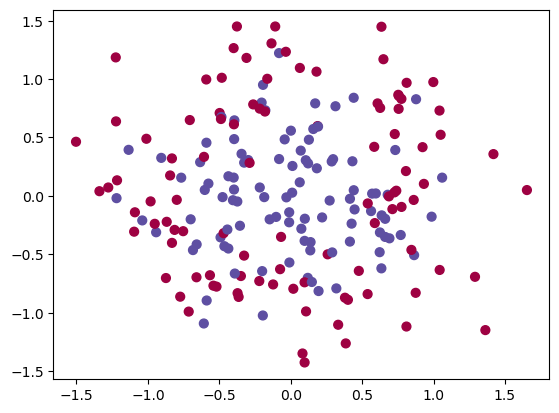

In [17]:

dataset = "noisy_circles"


X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])




# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

Cost function : 0.9305431814850187 at iter 0
Cost function : 0.4933347270318915 at iter 1000
Cost function : 0.46058284378054737 at iter 2000
Cost function : 0.4529434799002408 at iter 3000
Cost function : 0.4398831358799606 at iter 4000
Cost function : 0.42069464400066664 at iter 5000
Cost function : 0.48641807303544105 at iter 6000
Cost function : 0.48541726615716496 at iter 7000
Cost function : 0.47020567047381634 at iter 8000
Cost function : 0.4614933335625929 at iter 9000
Training complete!
Accuracy on this set is: 0.78


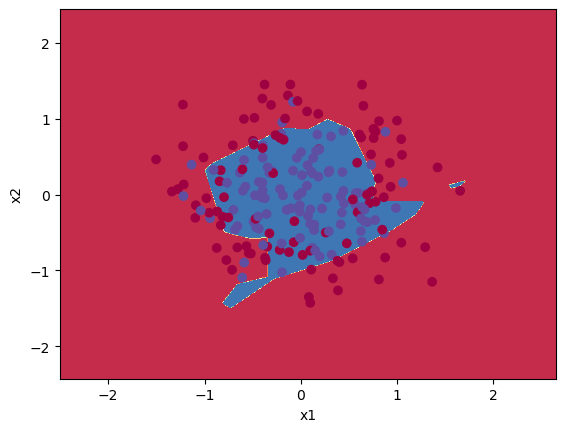

In [19]:
n_x = X.shape[0]
n_y = Y.shape[0]
hidden = [10, 5]

model = my_MPL(num_inputs = n_x, hidden_layers = hidden, num_outputs = n_y, activations=['relu'])
model.train(X, Y, num_iter=10000, learning_rate=1.2)
model.accuracy(X, Y)
plot_decision_boundary(model, X, Y)

### Try different optimization algorithms: GD, Adam, Momentum

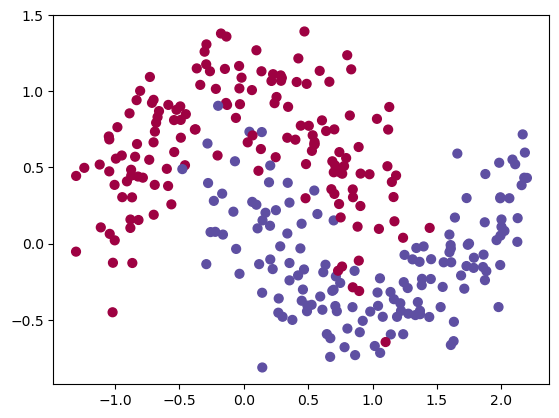

In [2]:
np.random.seed(3)
train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2) #300 #0.2 
# Visualize the data
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
train_X = train_X.T
train_Y = train_Y.reshape((1, train_Y.shape[0]))

In [3]:
print(train_Y.shape)
print(train_X.shape)

(1, 300)
(2, 300)


## using Adam

In [16]:
num_inputs = train_X.shape[0]
num_outputs = train_Y.shape[0]
hidden = [5, 2, 1]

model = my_MPL(num_inputs, hidden_layers=hidden, num_outputs=num_outputs, activations=['tanh'])
costs_Adam = model.train(train_X, train_Y, num_epochs=5000, learning_rate=0.0007, 
            mini_batch_size= 64, optimizer = "Adam")

model.accuracy(train_X, train_Y)


Cost after epoch 0 is 0.014971291497796137
Cost after epoch 1000 is 0.0024663674450383683
Cost after epoch 2000 is 0.0023076713530461707
Cost after epoch 3000 is 0.002150618808912825
Cost after epoch 4000 is 0.0023022588822315723
Accuracy on this set is: 0.94


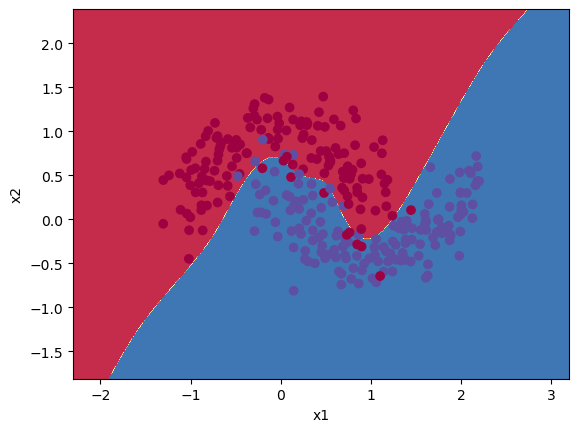

In [17]:
plot_decision_boundary(model, train_X, train_Y)

### using mini batch gradient descent

In [18]:
model = my_MPL(num_inputs, hidden_layers=hidden, num_outputs=num_outputs, activations=['tanh'])
costs_GD = model.train(train_X, train_Y, num_epochs=5000, learning_rate=0.0007, 
            mini_batch_size= 64, optimizer = "GD")

model.accuracy(train_X, train_Y)

Cost after epoch 0 is 0.015011597548126305
Cost after epoch 1000 is 0.007382662739534999
Cost after epoch 2000 is 0.006202864556705046
Cost after epoch 3000 is 0.005749208673401952
Cost after epoch 4000 is 0.005604342035190988
Accuracy on this set is: 0.88


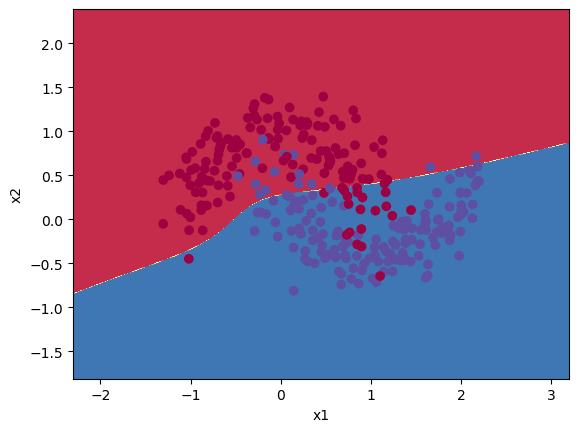

In [19]:
plot_decision_boundary(model, train_X, train_Y)

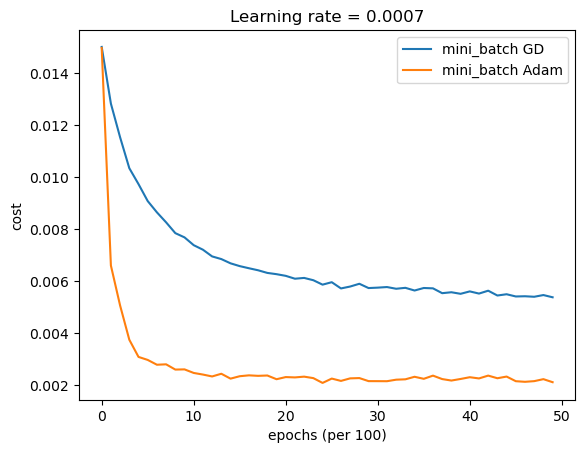

In [20]:
learning_rate  =0.0007
# plot the cost
plt.plot(costs_GD, label = "mini_batch GD")
plt.plot(costs_Adam, label = "mini_batch Adam")
plt.ylabel('cost')
plt.xlabel('epochs (per 100)')
plt.title("Learning rate = " + str(learning_rate))
plt.legend()
plt.show()